In [3]:
import torch
import torch.nn as nn

In [4]:
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## The Toy Dataset

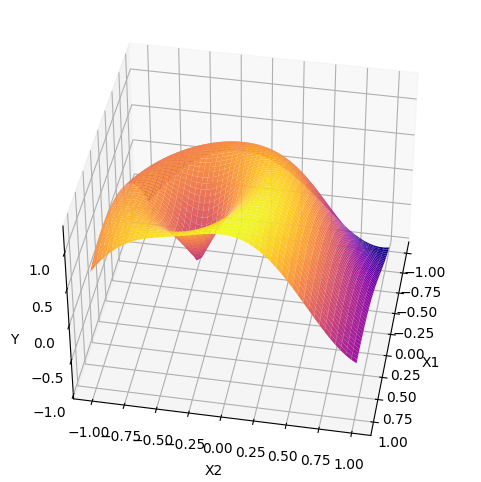

In [5]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1 + (X1+X2)/3

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])
yy = torch.Tensor(Y.reshape(-1,1))

########################

%matplotlib inline
ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.view_init(elev=40., azim=10)

ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# plt.savefig("./reg_toy_data.pdf", bbox_inches='tight')
plt.show()

## Defining Core Operations

In [6]:
class DistanceTransformBase(nn.Module):
    
    def __init__(self, input_dim, num_centers, p=1):
        super().__init__()
        self.input_dim = input_dim
        self.num_centers = num_centers
        self.p = p
        
        self.centers = torch.randn(num_centers, input_dim)/3.
        self.centers = nn.Parameter(self.centers)
    
    def forward(self, x):
        dists = torch.cdist(x, self.centers, p=self.p)
        return -dists

## Model and Training

In [7]:
h = 10
model = nn.Sequential(
    DistanceTransformBase(2, h),
    nn.BatchNorm1d(h),
    nn.ELU(),
    nn.Linear(h, 1),
#     DistanceTransformBase(h, 1),
#     nn.BatchNorm1d(1)
    )

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
criterion = nn.MSELoss()

Epoch: 99, Loss:0.0442899614572525
Epoch: 199, Loss:0.017244946211576462
Epoch: 299, Loss:0.00950497668236494
Epoch: 399, Loss:0.006211467552930117
Epoch: 499, Loss:0.004623129963874817
Epoch: 599, Loss:0.0036998135037720203
Epoch: 699, Loss:0.0031727601308375597
Epoch: 799, Loss:0.002782028866931796
Epoch: 899, Loss:0.00249344389885664
Epoch: 999, Loss:0.0022498215548694134


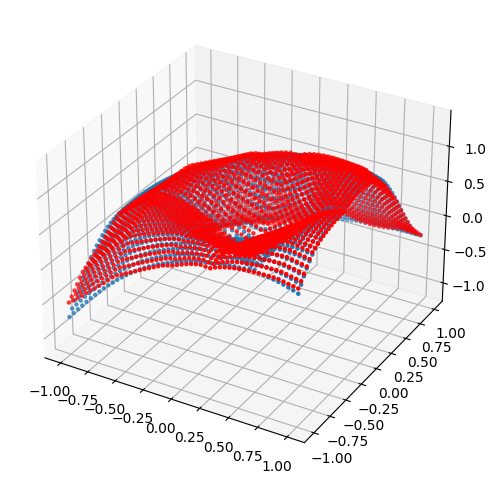

Epoch: 1099, Loss:0.002059259219095111
Epoch: 1199, Loss:0.001901939744129777
Epoch: 1299, Loss:0.0017720905598253012
Epoch: 1399, Loss:0.0016761340666562319
Epoch: 1499, Loss:0.0016021074261516333
Epoch: 1599, Loss:0.0015369491884484887
Epoch: 1699, Loss:0.00148009171243757
Epoch: 1799, Loss:0.0014318710891529918
Epoch: 1899, Loss:0.0013902743812650442
Epoch: 1999, Loss:0.0013480591587722301


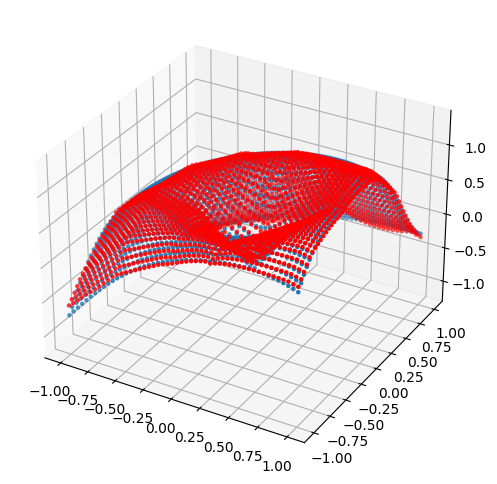

Epoch: 2099, Loss:0.0013155870838090777
Epoch: 2199, Loss:0.0012871124781668186
Epoch: 2299, Loss:0.0012619029730558395
Epoch: 2399, Loss:0.001239608507603407
Epoch: 2499, Loss:0.001219870406202972
Epoch: 2599, Loss:0.0012023492017760873
Epoch: 2699, Loss:0.0011862637475132942
Epoch: 2799, Loss:0.001169928116723895
Epoch: 2899, Loss:0.0011547165922820568
Epoch: 2999, Loss:0.0011398042552173138


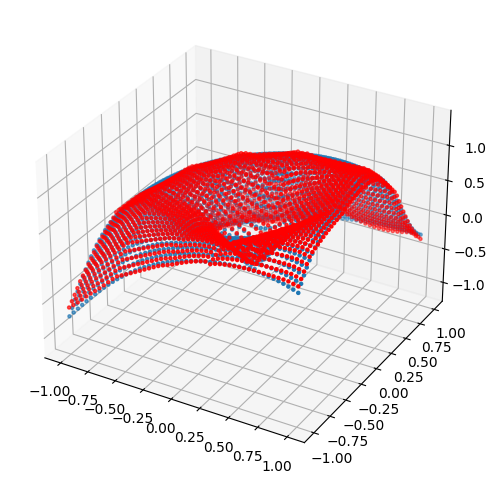

Epoch: 3099, Loss:0.0011270067188888788
Epoch: 3199, Loss:0.0011163197923451662
Epoch: 3299, Loss:0.0011062450939789414
Epoch: 3399, Loss:0.00109719461761415
Epoch: 3499, Loss:0.0010889280820265412
Epoch: 3599, Loss:0.0010813124245032668
Epoch: 3699, Loss:0.0010713726514950395
Epoch: 3799, Loss:0.001063783885911107
Epoch: 3899, Loss:0.0010574439074844122
Epoch: 3999, Loss:0.0010516024194657803


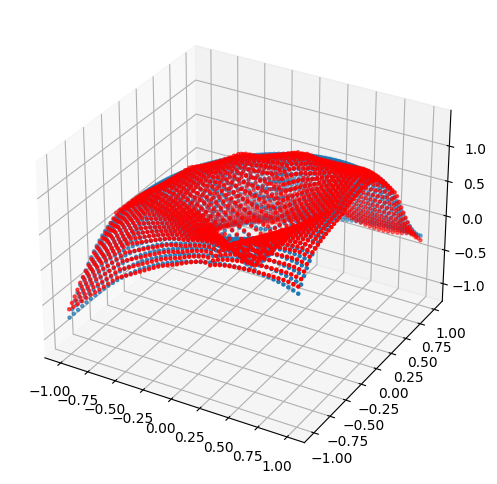

Epoch: 4099, Loss:0.001046153949573636
Epoch: 4199, Loss:0.0010410408722236753
Epoch: 4299, Loss:0.0010362135944887996
Epoch: 4399, Loss:0.0010316489497199655
Epoch: 4499, Loss:0.001027426216751337
Epoch: 4599, Loss:0.0010269584599882364
Epoch: 4699, Loss:0.001019747112877667
Epoch: 4799, Loss:0.0010168913286179304
Epoch: 4899, Loss:0.0010128873400390148
Epoch: 4999, Loss:0.0010097107151523232


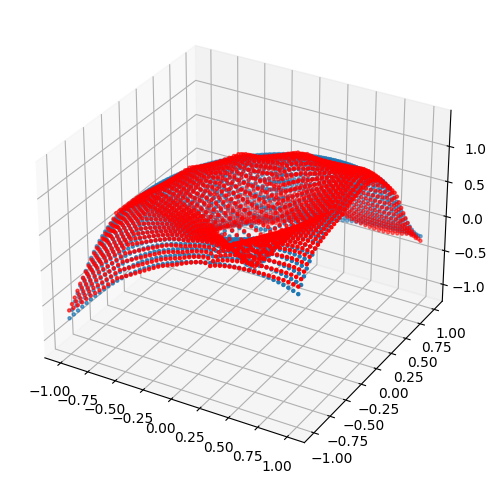

Epoch: 5099, Loss:0.0010213649366050959
Epoch: 5199, Loss:0.0010037546744570136
Epoch: 5299, Loss:0.0010028545511886477
Epoch: 5399, Loss:0.0009982077172026038
Epoch: 5499, Loss:0.0009956489084288478
Epoch: 5599, Loss:0.0009929707739502192
Epoch: 5699, Loss:0.0009904815815389156
Epoch: 5799, Loss:0.0009907494531944394
Epoch: 5899, Loss:0.0009856157703325152
Epoch: 5999, Loss:0.0009839312406256795


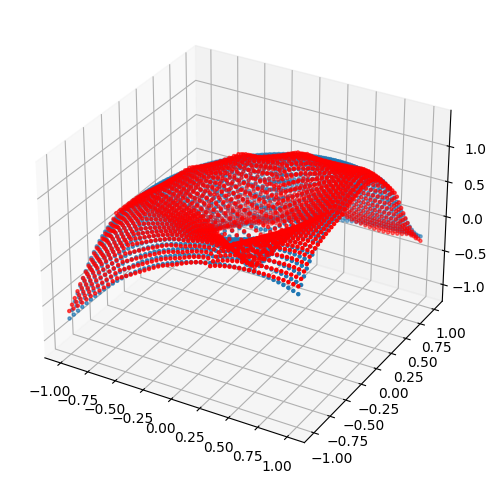

Epoch: 6099, Loss:0.0009809480980038643
Epoch: 6199, Loss:0.0009790420299395919
Epoch: 6299, Loss:0.0009764318238012493
Epoch: 6399, Loss:0.000974259281065315
Epoch: 6499, Loss:0.0009720653761178255
Epoch: 6599, Loss:0.0009699512738734484
Epoch: 6699, Loss:0.0009680351940914989
Epoch: 6799, Loss:0.0009657812188379467
Epoch: 6899, Loss:0.000963810714893043
Epoch: 6999, Loss:0.0009646298130974174


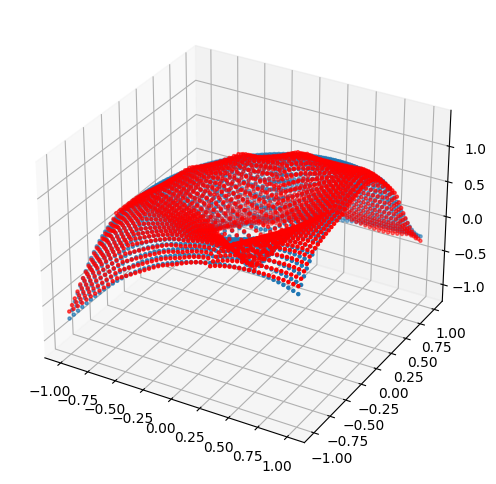

Epoch: 7099, Loss:0.000959829892963171
Epoch: 7199, Loss:0.000957949087023735
Epoch: 7299, Loss:0.0009569677640683949
Epoch: 7399, Loss:0.0009540714090690017
Epoch: 7499, Loss:0.000952230067923665
Epoch: 7599, Loss:0.0009503860492259264
Epoch: 7699, Loss:0.0009486228809691966
Epoch: 7799, Loss:0.0009469297365285456
Epoch: 7899, Loss:0.0009451070800423622
Epoch: 7999, Loss:0.0009518228471279144


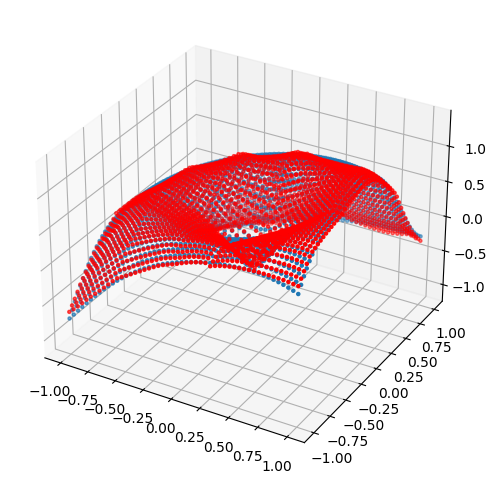

Epoch: 8099, Loss:0.0009405242162756622
Epoch: 8199, Loss:0.0009389894548803568
Epoch: 8299, Loss:0.0009369213366881013
Epoch: 8399, Loss:0.0009351893677376211
Epoch: 8499, Loss:0.0009346203878521919
Epoch: 8599, Loss:0.0009320310782641172
Epoch: 8699, Loss:0.0009300834499299526
Epoch: 8799, Loss:0.0009287045686505735
Epoch: 8899, Loss:0.000926821434404701
Epoch: 8999, Loss:0.0009252442396245897


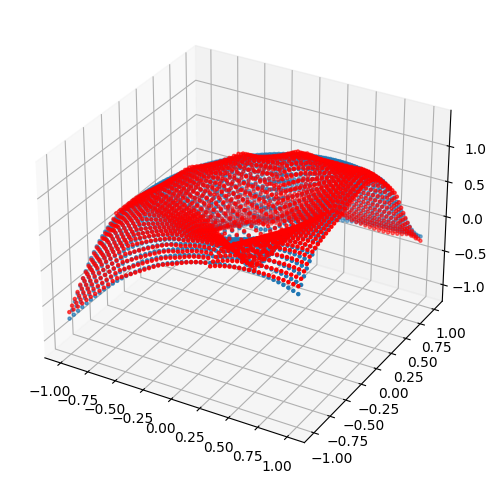

Epoch: 9099, Loss:0.0009571869159117341
Epoch: 9199, Loss:0.0009221712243743241
Epoch: 9299, Loss:0.0009229656425304711
Epoch: 9399, Loss:0.0009181625209748745
Epoch: 9499, Loss:0.0009307226864621043
Epoch: 9599, Loss:0.0009149665711447597
Epoch: 9699, Loss:0.0009323541889898479
Epoch: 9799, Loss:0.000911974988412112
Epoch: 9899, Loss:0.0009110996033996344
Epoch: 9999, Loss:0.0009091233951039612


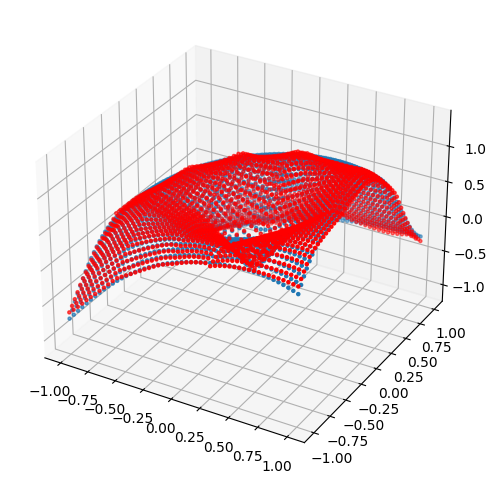

In [46]:
for epoch in range(10000):
    yout = model(xx)
    loss = criterion(yout, yy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%100 == 0:
        print(f'Epoch: {epoch}, Loss:{float(loss)}')


    if (epoch+1)%1000 == 0:
        ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
        ax.scatter(X1, X2, Y, marker= '.')
        ax.scatter(X1, X2, yout.data.cpu().numpy().reshape(-1), color='r', marker='.')
        plt.show()

## DT with mean and std

In [9]:
class EMA(object):

    def __init__(self, momentum=0.9, mu=None):
        self.mu = mu
        self.momentum = momentum

    def __call__(self, x):
        if self.mu is None:
            self.mu = x
        self.mu = self.momentum*self.mu + (1.0 - self.momentum)*x
        return self.mu    
    
## exponentially moving mean (and/or var) to basic dist
class DistanceTransformEMA(nn.Module):
    
    def __init__(self, input_dim, num_centers, p=1, bias=False):
        super().__init__()
#         bias=False
        self.input_dim = input_dim
        self.num_centers = num_centers
        self.p = p
        self.bias = nn.Parameter(torch.zeros(1, num_centers)) if bias else None
        
        self.centers = torch.rand(num_centers, input_dim)
        self.centers = nn.Parameter(self.centers)
        
        self.std = EMA()
        self.mean = EMA()
        
    def forward(self, x):
#         x = x[:, :self.input_dim]
        dists = torch.cdist(x, self.centers, p=self.p)
        
        ### normalize similar to UMAP
        mean = self.mean(dists.data.mean(dim=1, keepdim=True).data)
        std = self.std(torch.sqrt(dists.data.var(dim=1, keepdim=True)+1e-5))
        dists = (-dists+mean)/std

        if self.bias is not None: dists = dists+self.bias
        return dists

In [10]:
class OneActiv(nn.Module):
    '''
    Mode:
    -softplus : default
    -relu
    -exp_1.6
    -exp_abs
    '''
    def __init__(self, input_dim, mode='softplus', beta_init=0, max_similarity=1):
        super().__init__()
        self.input_dim = input_dim
        self.beta = nn.Parameter(torch.ones(1, input_dim)*beta_init)
        self.ms = max_similarity
        self.func_mode = None
        if mode == "softplus":
            self.func_mode = self.func_softplus
        elif mode == "exp_1.6":
            self.func_mode = self.func_exp_16
        elif mode == "exp_abs":
            self.func_mode = self.func_exp_abs
        elif mode == 'relu':
            self.func_mode = self.func_relu
        else:
            raise ValueError(f"mode: {mode} not recognized")
        pass
        
    def func_softplus(self, x):
        x = torch.exp(self.beta)*(x-self.ms) + self.ms
        x = nn.functional.softplus(x, beta=6)
        return x
    
    def func_relu(self, x):
        x = torch.exp(self.beta)*(x-self.ms) + self.ms
        x = torch.relu(x)
        return x
    
    def func_exp_16(self, x):
        x = torch.exp(-torch.exp(2*self.beta)*(torch.abs(x-self.ms)**1.6))
        return x
        
    def func_exp_abs(self, x):
        x = torch.exp(-torch.exp(2*self.beta)*torch.abs(x-self.ms))
        return x
    
    def forward(self, x):
        return self.func_mode(x)

In [11]:
class ScaleShift(nn.Module):
    
    def __init__(self, input_dim, scale_init=1, shift_init=0):
        super().__init__()
        self.scaler = nn.Parameter(torch.ones(1, input_dim))
        self.shifter =  nn.Parameter(torch.ones(1, input_dim))
        if scale_init is not None:
            self.scaler.data *= scale_init
            self.scaler.requires_grad = False
        if shift_init is not None:
            self.shifter.data *= shift_init
            self.shifter.requires_grad = False
        
    def forward(self, x):
        return x*self.scaler+self.shifter

In [12]:
class BatchNorm1dEMA(nn.Module):
    
    def __init__(self, input_dim):
        super().__init__()
        self.input_dim = input_dim
        self.std = EMA()
        self.mean = EMA()
        
    def forward(self, x):
        mean = self.mean(x.data.mean(dim=0, keepdim=True).data)
        std = self.std(torch.sqrt(x.data.var(dim=0, keepdim=True)+1e-5))
        x = (x-mean)/std
        return x

In [13]:
h = 20
'''
1. Needs Smooth Activation Function to work well for EMA p2. [Test 2^x instead of e^x in exponential functions]
2. BatchNorm/LayerNorm has been helping.. [Quantization of +Mean and (/Std can be replaced with BitShift]
3. Make use of Function Output Range in the [int8 -256, 256 range]-> before function and after function.
4. Scale floating point functions to optimize in the range of int8 (rather than -1,1 or gaussian.. make them -256, 256)
'''
model = nn.Sequential(
    DistanceTransformBase(2, h, p=1),
#     ScaleShift(h),
#     nn.BatchNorm1d(h),
    nn.LayerNorm(h),
#     BatchNorm1dEMA(h),
    nn.ReLU(),
#     OneActiv(h, mode="relu", max_similarity=0),
    nn.Linear(h, 1),
#     DistanceTransformBase(h, 1),
#     nn.BatchNorm1d(1)
    )

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
criterion = nn.MSELoss()

Epoch: 99, Loss:0.04763469472527504
Epoch: 199, Loss:0.021784255281090736
Epoch: 299, Loss:0.013501860201358795
Epoch: 399, Loss:0.009023642167448997
Epoch: 499, Loss:0.00756987975910306
Epoch: 599, Loss:0.006783694494515657
Epoch: 699, Loss:0.006247811950743198
Epoch: 799, Loss:0.005894307512789965
Epoch: 899, Loss:0.005649938713759184
Epoch: 999, Loss:0.005448401905596256


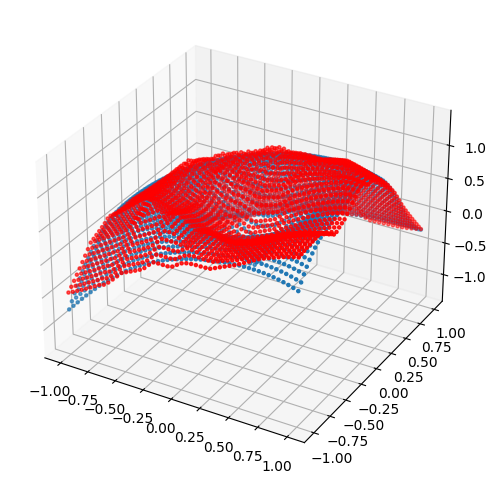

Epoch: 1099, Loss:0.005271153058856726
Epoch: 1199, Loss:0.005015346687287092
Epoch: 1299, Loss:0.004575563594698906
Epoch: 1399, Loss:0.004298253916203976
Epoch: 1499, Loss:0.003994411788880825
Epoch: 1599, Loss:0.0036860930267721415
Epoch: 1699, Loss:0.003421407425776124
Epoch: 1799, Loss:0.003175755962729454
Epoch: 1899, Loss:0.002959858626127243
Epoch: 1999, Loss:0.0028240596875548363


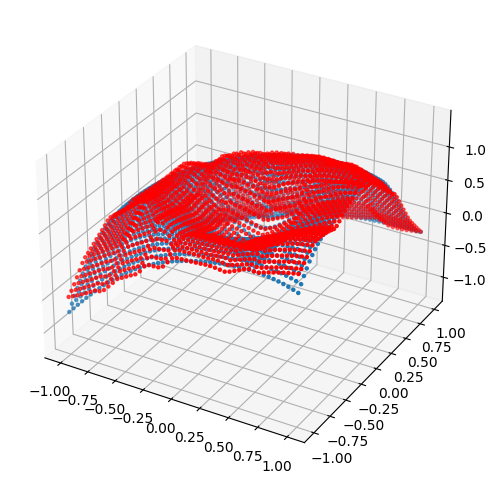

Epoch: 2099, Loss:0.0027060124557465315
Epoch: 2199, Loss:0.0026064631529152393
Epoch: 2299, Loss:0.0025200159288942814
Epoch: 2399, Loss:0.002441460033878684
Epoch: 2499, Loss:0.002367711625993252
Epoch: 2599, Loss:0.0023132658097893
Epoch: 2699, Loss:0.0022557927295565605
Epoch: 2799, Loss:0.0022011210676282644
Epoch: 2899, Loss:0.002141559263691306
Epoch: 2999, Loss:0.00205784710124135


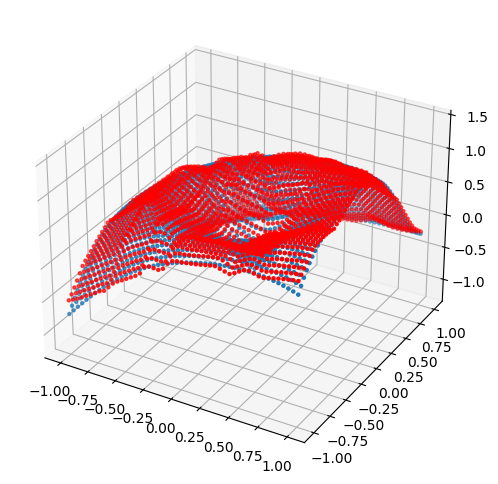

Epoch: 3099, Loss:0.0020102651324123144
Epoch: 3199, Loss:0.001963425427675247
Epoch: 3299, Loss:0.0018968821968883276
Epoch: 3399, Loss:0.0018355648498982191
Epoch: 3499, Loss:0.0018029517959803343
Epoch: 3599, Loss:0.0017800143687054515
Epoch: 3699, Loss:0.0017391885630786419
Epoch: 3799, Loss:0.0017097946256399155
Epoch: 3899, Loss:0.0016855808207765222
Epoch: 3999, Loss:0.0016519037308171391


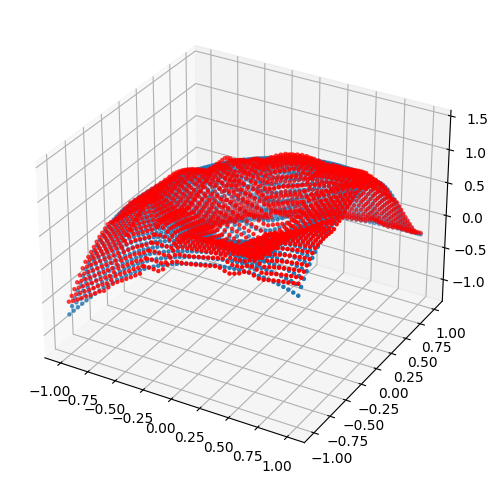

Epoch: 4099, Loss:0.0016287899343296885
Epoch: 4199, Loss:0.0016061542555689812
Epoch: 4299, Loss:0.0015859751729294658
Epoch: 4399, Loss:0.0014911146136000752
Epoch: 4499, Loss:0.001417545136064291
Epoch: 4599, Loss:0.0013774740509688854
Epoch: 4699, Loss:0.001338752917945385
Epoch: 4799, Loss:0.001307952799834311
Epoch: 4899, Loss:0.0012957946164533496
Epoch: 4999, Loss:0.0012681086082011461


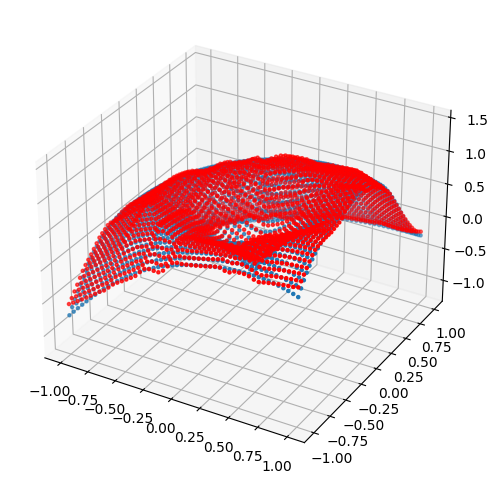

Epoch: 5099, Loss:0.0012610197300091386
Epoch: 5199, Loss:0.001237379852682352
Epoch: 5299, Loss:0.0012221168726682663
Epoch: 5399, Loss:0.0011987523175776005
Epoch: 5499, Loss:0.0011935904622077942
Epoch: 5599, Loss:0.0011769100092351437
Epoch: 5699, Loss:0.001163280801847577
Epoch: 5799, Loss:0.001159569015726447
Epoch: 5899, Loss:0.0011489457683637738
Epoch: 5999, Loss:0.0011476398212835193


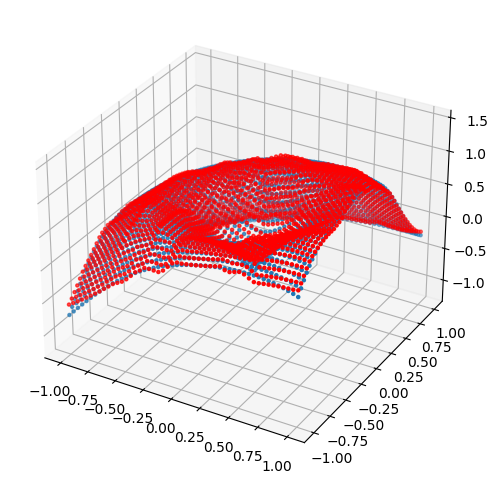

Epoch: 6099, Loss:0.0011432833271101117
Epoch: 6199, Loss:0.0011317465687170625
Epoch: 6299, Loss:0.001142526394687593
Epoch: 6399, Loss:0.001123927067965269
Epoch: 6499, Loss:0.0011165851028636098
Epoch: 6599, Loss:0.001135312719270587
Epoch: 6699, Loss:0.0011116747045889497
Epoch: 6799, Loss:0.0011081267148256302
Epoch: 6899, Loss:0.001092381775379181
Epoch: 6999, Loss:0.0010841803159564734


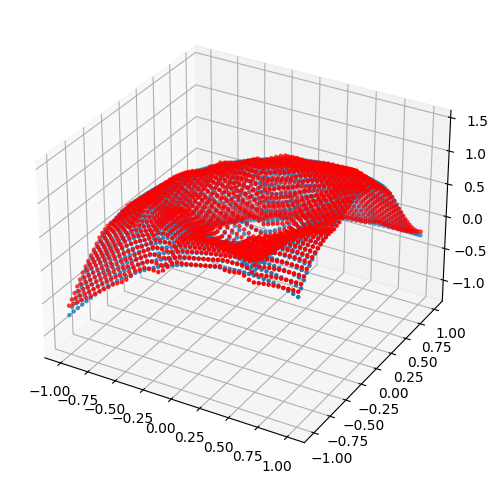

Epoch: 7099, Loss:0.0010861591435968876
Epoch: 7199, Loss:0.0011112842475995421
Epoch: 7299, Loss:0.001069465302862227
Epoch: 7399, Loss:0.001067131757736206
Epoch: 7499, Loss:0.0010604285635054111
Epoch: 7599, Loss:0.00106232357211411
Epoch: 7699, Loss:0.00106039026286453
Epoch: 7799, Loss:0.001054617459885776
Epoch: 7899, Loss:0.001053242594935
Epoch: 7999, Loss:0.0010519888019189239


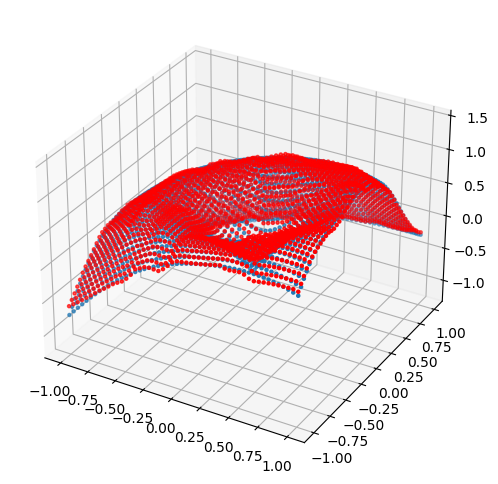

Epoch: 8099, Loss:0.0010652736527845263
Epoch: 8199, Loss:0.0010475595481693745
Epoch: 8299, Loss:0.0010440923506394029
Epoch: 8399, Loss:0.0010432329727336764
Epoch: 8499, Loss:0.0010485840030014515
Epoch: 8599, Loss:0.0010411132825538516
Epoch: 8699, Loss:0.001040575560182333
Epoch: 8799, Loss:0.0010331465164199471
Epoch: 8899, Loss:0.001035453169606626
Epoch: 8999, Loss:0.0010386848589405417


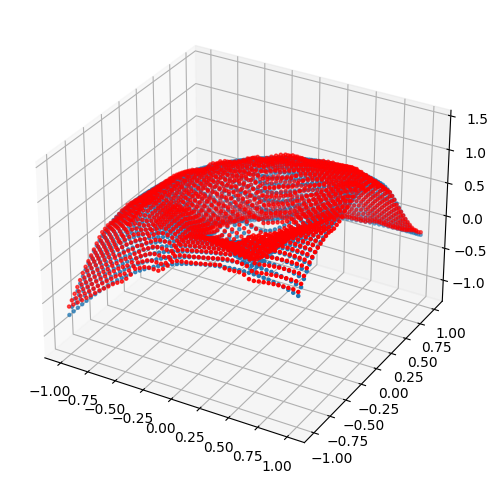

Epoch: 9099, Loss:0.0010280548594892025
Epoch: 9199, Loss:0.0010281543945893645
Epoch: 9299, Loss:0.0010290035279467702
Epoch: 9399, Loss:0.0010300783906131983
Epoch: 9499, Loss:0.001031945925205946
Epoch: 9599, Loss:0.0010312986560165882
Epoch: 9699, Loss:0.001020147348754108
Epoch: 9799, Loss:0.0010208484018221498
Epoch: 9899, Loss:0.0010001115733757615
Epoch: 9999, Loss:0.0009999225148931146


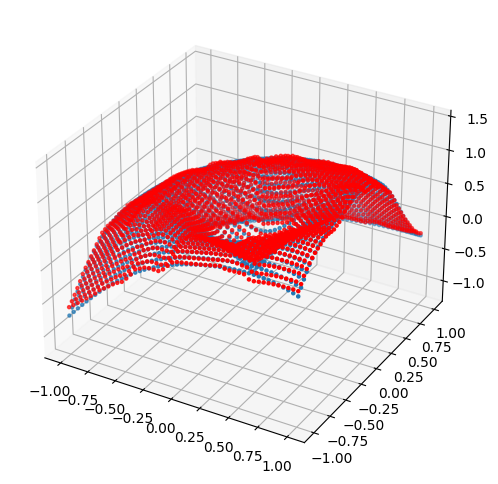

In [184]:
for epoch in range(10000):
    yout = model(xx)
    loss = criterion(yout, yy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%100 == 0:
        print(f'Epoch: {epoch}, Loss:{float(loss)}')


    if (epoch+1)%1000 == 0:
        ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
        ax.scatter(X1, X2, Y, marker= '.')
        ax.scatter(X1, X2, yout.data.cpu().numpy().reshape(-1), color='r', marker='.')
        plt.show()

## BitShift for scaling ... 

In [15]:
x = torch.linspace(-3.5, 3.5, steps=100)

In [16]:
y0 = (x*32).type(torch.int8)
# plt.plot(x, y0)
y0

tensor([-112, -109, -107, -105, -102, -100,  -98,  -96,  -93,  -91,  -89,  -87,
         -84,  -82,  -80,  -78,  -75,  -73,  -71,  -69,  -66,  -64,  -62,  -59,
         -57,  -55,  -53,  -50,  -48,  -46,  -44,  -41,  -39,  -37,  -35,  -32,
         -30,  -28,  -26,  -23,  -21,  -19,  -16,  -14,  -12,  -10,   -7,   -5,
          -3,   -1,    1,    3,    5,    7,   10,   12,   14,   16,   19,   21,
          23,   26,   28,   30,   32,   35,   37,   39,   41,   44,   46,   48,
          50,   53,   55,   57,   59,   62,   64,   66,   69,   71,   73,   75,
          78,   80,   82,   84,   87,   89,   91,   93,   96,   98,  100,  102,
         105,  107,  109,  112], dtype=torch.int8)

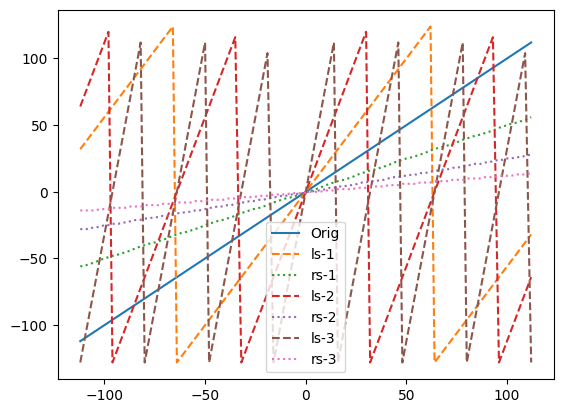

In [17]:
plt.plot(y0, y0, label=f"Orig")
for i in range(1, 4):
    plt.plot(y0, torch.bitwise_left_shift(y0, i), label=f"ls-{i}", linestyle="dashed")
    plt.plot(y0, torch.bitwise_right_shift(y0, i), label=f"rs-{i}", linestyle="dotted")
plt.legend()

## Integer Quantized Tensor

In [187]:
def float_to_int8_range(x):
    '''
    x in (-3, 3)
    '''
    x = torch.clamp(x, -3, 3)/3*127
    return x

In [188]:
def int8_to_float_range(x):
    return x/127*3

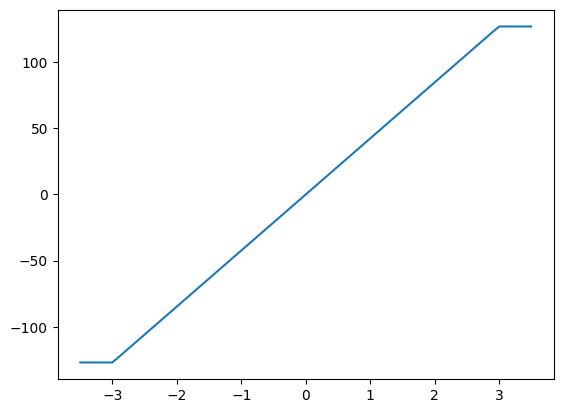

In [189]:
y0 = torch.clamp(x, -3, 3)*127/3
plt.plot(x, y0)

(-3.0, 3.0)

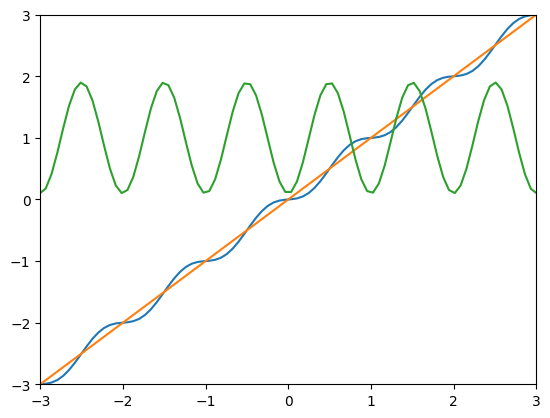

In [191]:
a = 0.5/torch.pi
y1 = x - torch.sin(x/a)*0.9*a
dy1 = 1 - torch.cos(x/a)*0.9

plt.plot(x, y1)
plt.plot(x, x)
plt.plot(x, dy1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [298]:
last_buffer = None
class ST_IntQuantX(torch.autograd.Function):
    @staticmethod
    def forward(x, hardness=0.9, alpha=1.0):
        ## Convert -3,3 range to -127, 127 range
        qx = torch.round(x*127/3, decimals=0)/127*3
        if t < 1.0:
            _a = 2*torch.pi
            y1 = x - torch.sin(x*127/3*_a)*hardness/_a/127*3
            return qx*alpha+y1*(1-alpha)
        return qx
        
    @staticmethod
    def setup_context(ctx, inputs, output):
        # ctx is a context object that can be used to stash information
        # for backward computation
        x, hardness,alpha = inputs
        ctx.x = x
        ctx.hardness = hardness

    @staticmethod
    def backward(ctx, grad_output):
        global last_buffer
        # We return as many input gradients as there were arguments.
        # Gradients of non-Tensor arguments to forward must be None.
        gradx = grad_output*(1 - torch.cos(2*torch.pi*ctx.x*127/3)* ctx.hardness)
        last_buffer = (ctx.x, gradx, grad_output)
        return gradx, None, None

In [299]:
ST_IntQuantX.apply(x, 0.9, 1.0)*127/3

tensor([-148.0000, -145.0000, -142.0000, -139.0000, -136.0000, -133.0000,
        -130.0000, -127.0000, -124.0000, -121.0000, -118.0000, -115.0000,
        -112.0000, -109.0000, -106.0000, -103.0000, -100.0000,  -97.0000,
         -94.0000,  -91.0000,  -88.0000,  -85.0000,  -82.0000,  -79.0000,
         -76.0000,  -73.0000,  -70.0000,  -67.0000,  -64.0000,  -61.0000,
         -58.0000,  -55.0000,  -52.0000,  -49.0000,  -46.0000,  -43.0000,
         -40.0000,  -37.0000,  -34.0000,  -31.0000,  -28.0000,  -25.0000,
         -22.0000,  -19.0000,  -16.0000,  -13.0000,  -10.0000,   -7.0000,
          -4.0000,   -1.0000,    1.0000,    4.0000,    7.0000,   10.0000,
          13.0000,   16.0000,   19.0000,   22.0000,   25.0000,   28.0000,
          31.0000,   34.0000,   37.0000,   40.0000,   43.0000,   46.0000,
          49.0000,   52.0000,   55.0000,   58.0000,   61.0000,   64.0000,
          67.0000,   70.0000,   73.0000,   76.0000,   79.0000,   82.0000,
          85.0000,   88.0000,   91.000

(-3.85, 3.85, -4.125, 4.125)

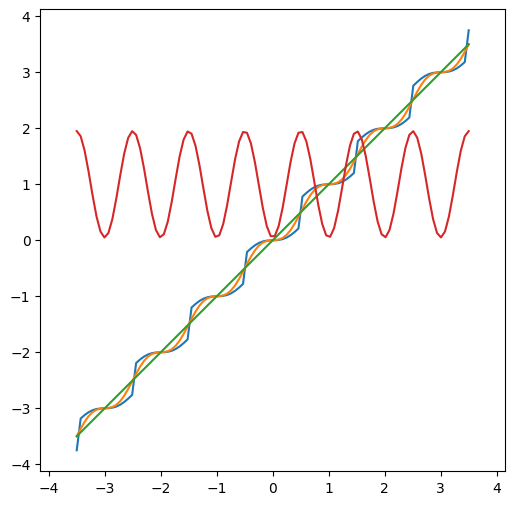

In [300]:
plt.figure(figsize=(6,6))

s = 0.95
qx = ST_IntQuantX.apply(x*3/127, s, 0.5)/3*127
plt.plot(x, qx)

a = 0.5/torch.pi
y1 = x - torch.sin(x/a)*s*a
dy1 = 1 - torch.cos(x/a)*s

plt.plot(x, y1)
plt.plot(x, x)
plt.plot(x, dy1)

# t = 0.4
# plt.plot(x, qx*t+y1*(1-t))


# plt.xlim(-3, 3)
# plt.ylim(-3, 3)
plt.axis('equal')

In [301]:
x_= torch.autograd.Variable(x, requires_grad=True)
ST_IntQuantX.apply(x_, 0.9, 1.0).mean().backward()

In [302]:
x_.grad

tensor([0.0055, 0.0058, 0.0062, 0.0065, 0.0069, 0.0072, 0.0076, 0.0080, 0.0083,
        0.0087, 0.0091, 0.0095, 0.0099, 0.0102, 0.0106, 0.0110, 0.0114, 0.0118,
        0.0121, 0.0125, 0.0129, 0.0132, 0.0136, 0.0139, 0.0143, 0.0146, 0.0149,
        0.0152, 0.0155, 0.0158, 0.0161, 0.0164, 0.0166, 0.0169, 0.0171, 0.0174,
        0.0176, 0.0178, 0.0180, 0.0181, 0.0183, 0.0184, 0.0186, 0.0187, 0.0188,
        0.0188, 0.0189, 0.0189, 0.0190, 0.0190, 0.0190, 0.0190, 0.0189, 0.0189,
        0.0188, 0.0188, 0.0187, 0.0186, 0.0184, 0.0183, 0.0181, 0.0180, 0.0178,
        0.0176, 0.0174, 0.0171, 0.0169, 0.0166, 0.0164, 0.0161, 0.0158, 0.0155,
        0.0152, 0.0149, 0.0146, 0.0143, 0.0139, 0.0136, 0.0132, 0.0129, 0.0125,
        0.0121, 0.0118, 0.0114, 0.0110, 0.0106, 0.0102, 0.0099, 0.0095, 0.0091,
        0.0087, 0.0083, 0.0080, 0.0076, 0.0072, 0.0069, 0.0065, 0.0062, 0.0058,
        0.0055])

#### Train a simple model with StraightThrough IntQuant

In [377]:
class ST_Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        h = 20
        self.w1 = nn.Parameter(torch.randn(2, h))
        self.b1 = nn.Parameter(torch.zeros(h))
        self.w2 = nn.Parameter(torch.randn(h, 1))                
        self.b2 = nn.Parameter(torch.zeros(1))
        self.actf = nn.ELU()
        self.norm = nn.LayerNorm(h)
        
    def forward(self, x, a=0.5):
#         x = float_to_int8_range(x)
        t = 0.0#98
        w1, b1, w2, b2 = self.w1, self.b1, self.w2, self.b2
        
#         print(t, s)
#         x = ST_IntQuantX.apply(x*127/3, t)*3/127
#         w1 = ST_IntQuantX.apply(self.w1*127/3, t)*3/127

        x = ST_IntQuantX.apply(x, t, a)
        w1 = ST_IntQuantX.apply(self.w1, t, a)

#         x = torch.round(x/3*127, decimals=0)/127*3
#         w1 = torch.round(w1/3*127, decimals=0)/127*3


#         b1 = ST_IntQuantX.apply(self.b1, t)        
#         w2 = ST_IntQuantX.apply(self.w2, t)        
#         b2 = ST_IntQuantX.apply(self.b2, t)        
        
        x = -torch.cdist(x, w1.t())
        x = self.actf(self.norm(x+b1))
        x = x@w2+b2
        return x

In [378]:
model = ST_Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
criterion = nn.MSELoss()

Epoch: 99, Loss:0.2536091208457947, alpha=1
Epoch: 199, Loss:0.11428143084049225, alpha=1
Epoch: 299, Loss:0.06983498483896255, alpha=1
Epoch: 399, Loss:0.049363844096660614, alpha=1
Epoch: 499, Loss:0.03816188499331474, alpha=1
Epoch: 599, Loss:0.032263774424791336, alpha=1
Epoch: 699, Loss:0.02739318273961544, alpha=1
Epoch: 799, Loss:0.024669833481311798, alpha=1
Epoch: 899, Loss:0.02171066589653492, alpha=1
Epoch: 999, Loss:0.020286154001951218, alpha=1


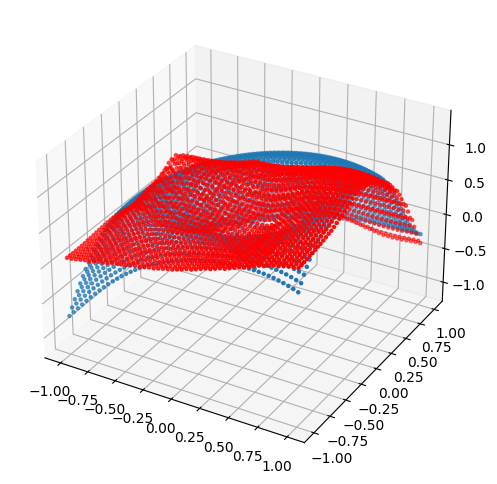

Epoch: 1099, Loss:0.01808037981390953, alpha=1
Epoch: 1199, Loss:0.01703261025249958, alpha=1
Epoch: 1299, Loss:0.01582956314086914, alpha=1
Epoch: 1399, Loss:0.0150838578119874, alpha=1
Epoch: 1499, Loss:0.013381303288042545, alpha=1
Epoch: 1599, Loss:0.011869220994412899, alpha=1
Epoch: 1699, Loss:0.013954210095107555, alpha=1
Epoch: 1799, Loss:0.010172775015234947, alpha=1
Epoch: 1899, Loss:0.009441554546356201, alpha=1
Epoch: 1999, Loss:0.008685178123414516, alpha=1


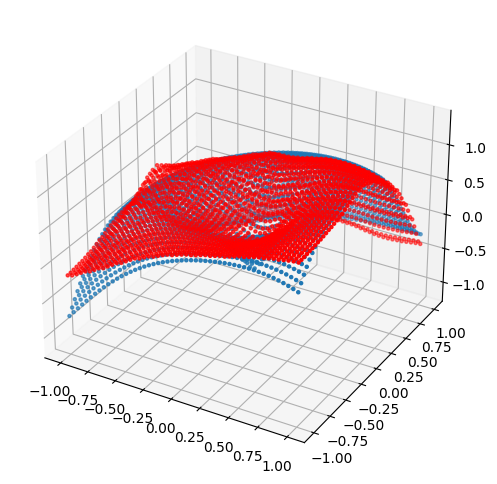

Epoch: 2099, Loss:0.008181115612387657, alpha=1
Epoch: 2199, Loss:0.007539984304457903, alpha=1
Epoch: 2299, Loss:0.007932585664093494, alpha=1
Epoch: 2399, Loss:0.006673564203083515, alpha=1
Epoch: 2499, Loss:0.009792524389922619, alpha=1
Epoch: 2599, Loss:0.008273630402982235, alpha=1
Epoch: 2699, Loss:0.006417323835194111, alpha=1
Epoch: 2799, Loss:0.006185530684888363, alpha=1
Epoch: 2899, Loss:0.006087956950068474, alpha=1
Epoch: 2999, Loss:0.006153545808047056, alpha=1


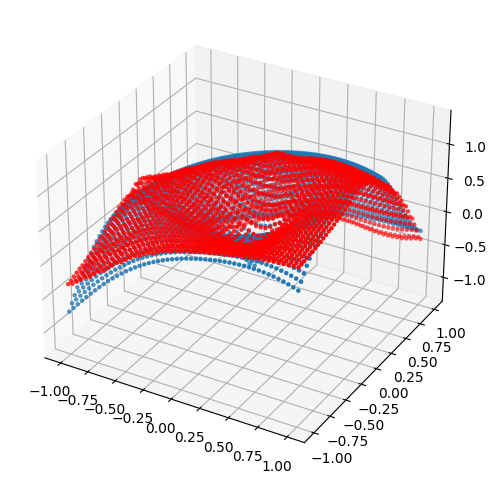

Epoch: 3099, Loss:0.0054612429812550545, alpha=1
Epoch: 3199, Loss:0.005137131083756685, alpha=1
Epoch: 3299, Loss:0.004617766011506319, alpha=1
Epoch: 3399, Loss:0.00529502471908927, alpha=1
Epoch: 3499, Loss:0.004932597745209932, alpha=1
Epoch: 3599, Loss:0.010608900338411331, alpha=1
Epoch: 3699, Loss:0.003846488194540143, alpha=1
Epoch: 3799, Loss:0.0039284611120820045, alpha=1
Epoch: 3899, Loss:0.004385387524962425, alpha=1
Epoch: 3999, Loss:0.006641692947596312, alpha=1


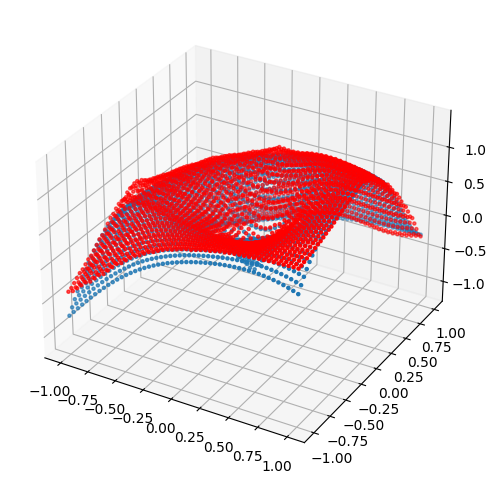

Epoch: 4099, Loss:0.0039020690601319075, alpha=1
Epoch: 4199, Loss:0.010370404459536076, alpha=1
Epoch: 4299, Loss:0.006510992534458637, alpha=1
Epoch: 4399, Loss:0.004480659496039152, alpha=1
Epoch: 4499, Loss:0.003958331886678934, alpha=1
Epoch: 4599, Loss:0.007995075546205044, alpha=1
Epoch: 4699, Loss:0.00358637236058712, alpha=1
Epoch: 4799, Loss:0.00454206857830286, alpha=1
Epoch: 4899, Loss:0.0034576007165014744, alpha=1
Epoch: 4999, Loss:0.0034316666424274445, alpha=1


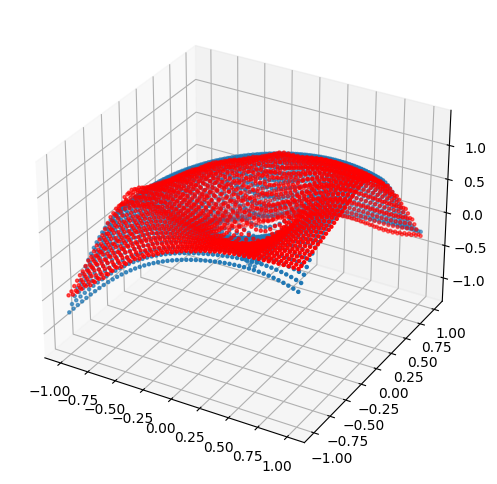

Epoch: 5099, Loss:0.005492357071489096, alpha=1
Epoch: 5199, Loss:0.004053414799273014, alpha=1
Epoch: 5299, Loss:0.005461687687784433, alpha=1
Epoch: 5399, Loss:0.004287759307771921, alpha=1
Epoch: 5499, Loss:0.0028386700432747602, alpha=1
Epoch: 5599, Loss:0.0038876328617334366, alpha=1
Epoch: 5699, Loss:0.003307903651148081, alpha=1
Epoch: 5799, Loss:0.005929355043917894, alpha=1
Epoch: 5899, Loss:0.004438851028680801, alpha=1
Epoch: 5999, Loss:0.0030102934688329697, alpha=1


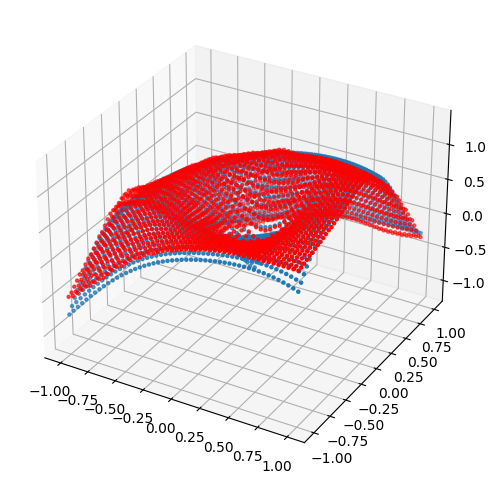

Epoch: 6099, Loss:0.003457469865679741, alpha=1
Epoch: 6199, Loss:0.009013372473418713, alpha=1
Epoch: 6299, Loss:0.003779343795031309, alpha=1
Epoch: 6399, Loss:0.0031457783188670874, alpha=1
Epoch: 6499, Loss:0.00483647221699357, alpha=1
Epoch: 6599, Loss:0.005272194277495146, alpha=1
Epoch: 6699, Loss:0.0027410259936004877, alpha=1
Epoch: 6799, Loss:0.003843169892206788, alpha=1
Epoch: 6899, Loss:0.003305448219180107, alpha=1
Epoch: 6999, Loss:0.0026278698351234198, alpha=1


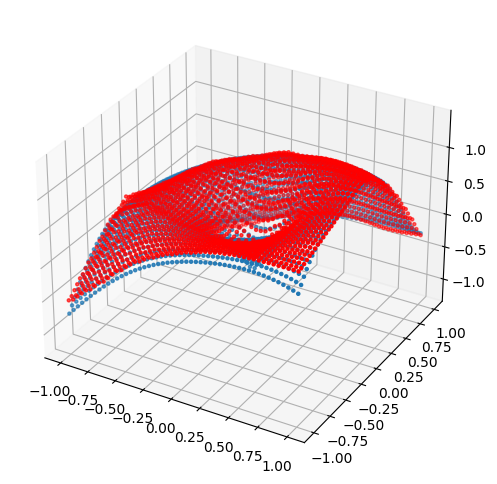

Epoch: 7099, Loss:0.003232198301702738, alpha=1
Epoch: 7199, Loss:0.002411412075161934, alpha=1
Epoch: 7299, Loss:0.00303128594532609, alpha=1
Epoch: 7399, Loss:0.00306963874027133, alpha=1
Epoch: 7499, Loss:0.0022663844283670187, alpha=1
Epoch: 7599, Loss:0.0031295455992221832, alpha=1
Epoch: 7699, Loss:0.002515175612643361, alpha=1
Epoch: 7799, Loss:0.005286714527755976, alpha=1
Epoch: 7899, Loss:0.002398259472101927, alpha=1
Epoch: 7999, Loss:0.003210620488971472, alpha=1


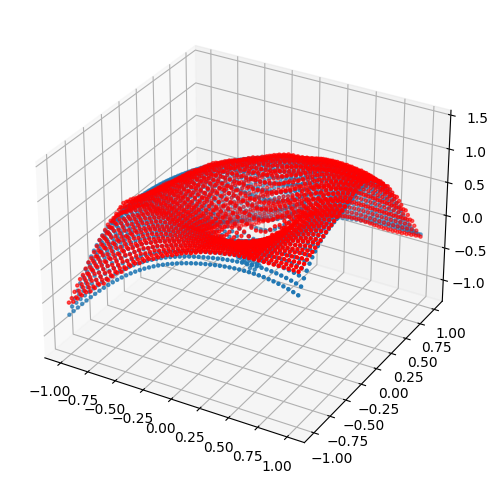

Epoch: 8099, Loss:0.002931706141680479, alpha=1
Epoch: 8199, Loss:0.004191332031041384, alpha=1
Epoch: 8299, Loss:0.012506833299994469, alpha=1
Epoch: 8399, Loss:0.005863429978489876, alpha=1
Epoch: 8499, Loss:0.0022862032055854797, alpha=1
Epoch: 8599, Loss:0.007189326453953981, alpha=1
Epoch: 8699, Loss:0.012777123600244522, alpha=1
Epoch: 8799, Loss:0.0032657855190336704, alpha=1
Epoch: 8899, Loss:0.002131636254489422, alpha=1
Epoch: 8999, Loss:0.0021416491363197565, alpha=1


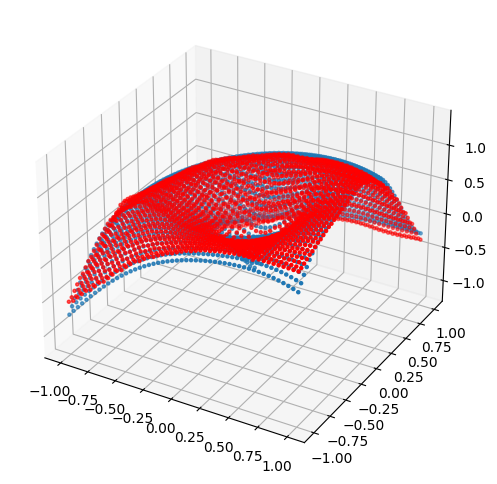

Epoch: 9099, Loss:0.002319714520126581, alpha=1
Epoch: 9199, Loss:0.002002603840082884, alpha=1
Epoch: 9299, Loss:0.002024292480200529, alpha=1
Epoch: 9399, Loss:0.002802079077810049, alpha=1
Epoch: 9499, Loss:0.0023324175272136927, alpha=1
Epoch: 9599, Loss:0.0024584527127444744, alpha=1
Epoch: 9699, Loss:0.002824999624863267, alpha=1
Epoch: 9799, Loss:0.0052347443997859955, alpha=1
Epoch: 9899, Loss:0.0017112341010943055, alpha=1
Epoch: 9999, Loss:0.001747812028042972, alpha=1


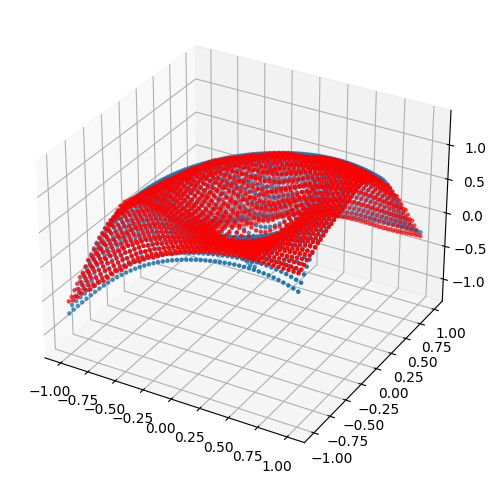

In [379]:
EPOCHS = 10000
losses = []
for epoch in range(EPOCHS):
    alpha = 1
#     alpha = ((epoch/EPOCHS*10)%1)*0.6 + 0.4 ## repeat total of 10 times with value between 0.4-1.0
    yout = model(xx, alpha)
    loss = criterion(yout, yy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%100 == 0:
        print(f'Epoch: {epoch}, Loss:{float(loss)}, alpha={alpha}')
        losses.append(float(loss))


    if (epoch+1)%1000 == 0:
        ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
        ax.scatter(X1, X2, Y, marker= '.')
        ax.scatter(X1, X2, yout.data.cpu().numpy().reshape(-1), color='r', marker='.')
        plt.show()

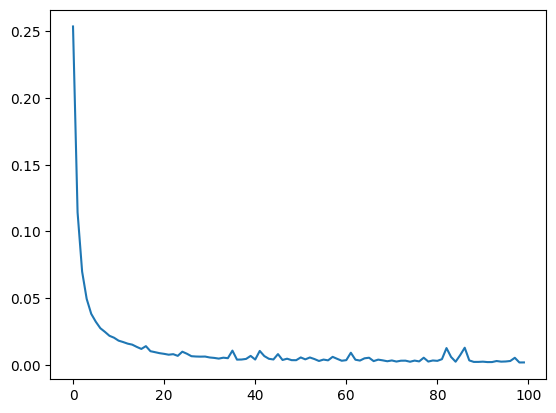

In [380]:
plt.plot(losses)

Epoch: 9999, Loss:0.0020995098166167736
Epoch: 9999, Loss_Quant:0.0020995098166167736


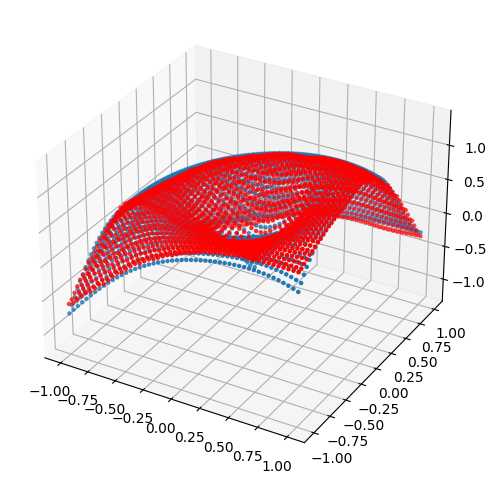

In [381]:
yout = model(xx, alpha)
loss = criterion(yout, yy)
print(f'Epoch: {epoch}, Loss:{float(loss)}')

yout = model(xx, a=1.0)
loss = criterion(yout, yy)
print(f'Epoch: {epoch}, Loss_Quant:{float(loss)}')
ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.scatter(X1, X2, Y, marker= '.')
ax.scatter(X1, X2, yout.data.cpu().numpy().reshape(-1), color='r', marker='.')
plt.show()

In [346]:
# w1 = ST_IntQuantX.apply(ST_Net.w1, 0.9)
# x1 = ST_IntQuantX.apply(x, 0.9)

In [355]:
last_buffer

(Parameter containing:
 tensor([[-0.7801, -0.5200,  1.2288,  1.2513,  0.4009,  0.4256,  0.1758, -0.1664,
           0.8503,  0.8741,  0.4959, -0.6607,  1.0164, -0.9216, -2.2672,  0.3784,
           0.7083, -0.1871, -0.7558,  0.3315],
         [ 1.4174, -0.6851,  0.9219, -0.7555,  0.1887, -0.7555, -0.3423,  2.2912,
           0.2368,  0.2597, -0.4257,  1.0628, -1.4182, -1.2993,  1.3460,  0.1895,
           1.7012, -1.1099, -0.1178, -0.3313]], requires_grad=True),
 tensor([[ 3.6416e-04,  5.3171e-04, -4.0565e-04, -2.8544e-04, -1.1503e-03,
           1.1665e-03, -2.1459e-02,  5.4682e-05,  1.3612e-03, -5.5111e-04,
          -4.0655e-04, -9.4136e-06,  3.8584e-04, -5.5701e-04,  8.6085e-05,
           2.4593e-03, -1.5772e-05,  4.1721e-04,  5.2175e-05, -1.9658e-03],
         [-1.0241e-03, -1.0140e-03,  2.0880e-04, -1.4678e-04,  1.0027e-03,
          -1.4542e-03,  2.9475e-02,  4.0128e-05, -1.3972e-03,  5.7362e-04,
           5.8315e-04,  6.5570e-05, -4.9203e-04,  7.3545e-04, -5.3312e-05,
       

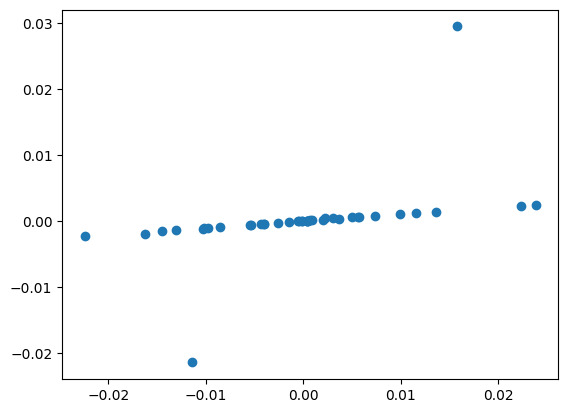

In [356]:
plt.scatter(last_buffer[2].reshape(-1), last_buffer[1].reshape(-1))

## Scale by LR shift IntQuant

In [40]:
'''
Scale up might go any
'''
print()

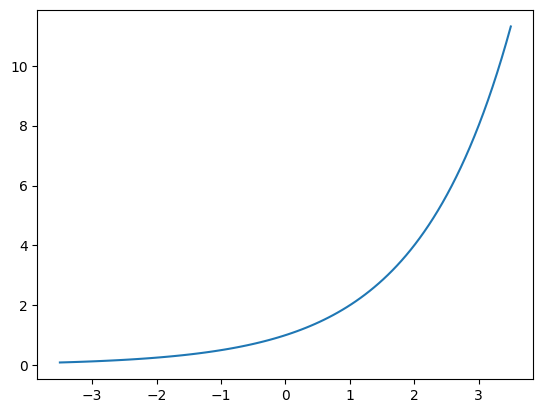

In [41]:
plt.plot(x, 2**x)

NameError: name 'torch' is not defined